In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')

file1 = os.path.join((os.environ.get('HOME')),'Downloads', 'athlete_events.csv') 
file2 = os.path.join((os.environ.get('HOME')),'Downloads', 'noc_regions.csv') 
file3 = os.path.join((os.environ.get('HOME')),'Downloads', 'countrypop.csv')
# file1 = '/Users/danvaldes/Downloads/athlete_events.csv'
# file2 = '/Users/danvaldes/Downloads/noc_regions.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)


final_df = pd.merge(df1, df2, on='NOC', how='inner')
final_df.drop(columns=['notes']).rename(columns = {'Height':'Height (cm)','Weight':'Weight (kg)','region':'Country'})

final_df.head(20);

df = final_df.dropna()
df.head();

In [2]:
# creating sport parent category column

d = {
    'Aquatic Sport': ['Swimming', 'Diving','Synchronized Swimming', 'Water Polo'],
    'Track & Field': ['Athletics','Modern Pentathlon', 'Triathlon', 'Biathlon', 'Cycling'],
    'Team Sport': ['Softball', 'Basketball', 'Volleyball', 'Beach Volleyball',
                   'Handball', 'Rugby', 'Lacrosse'],
    'Gymnastics': ['Gymnastics', 'Rhytmic Gymnastics', 'Trampolining'],
    'Weightlifting': ['Weightlifting'],
    'Combat Sport': ['Boxing','Judo', 'Wrestling', 'Taekwondo'],
    'Winter Sport': ['Short Track Speed Skating', 'Ski Jumping', 'Cross Country Skiing',
                     'Luge','Bobsleigh', 'Alpine Skiing', 'Curling', 'Snowboarding',
                     'Ice Hockey', 'Hockey', 'Speed Skating']
    }

# unpacks lists so it's {sport: category_label}
d = {sport: cat for cat,l in d.items() for sport in l}
df['Sport Category'] = df['Sport'].map(d);

In [23]:
# creating BMI column

BMI = df['Weight (kg)'] / (df['Height (cm)'] / 100) ** 2

df['BMI'] = BMI.round(2)

df = df[['ID','Name','Sex','Age','Height (cm)','Weight (kg)','BMI','Team','Games','Year','Season','City','Sport','Event','Medal','NOC','Country','Sport Category']]

## ATHLETES BY NATION: CHINA and US

In [ ]:
reduced_olympic_data = df[["Name", "Country", "Games","Medal"]]

# countries of interest
american_athletes_df = reduced_olympic_data[reduced_olympic_data['Country'] == 'USA']

chinese_athletes_df = reduced_olympic_data[reduced_olympic_data['Country'] == 'China']

# count of national athletes by year
usa_athlete_by_year = american_athletes_df["Games"].value_counts().head(16)

china_athletes_by_year = chinese_athletes_df["Games"].value_counts()

In [ ]:
games = ["2008 Summer", "2012 Summer", "2016 Summer", "1996 Summer",
        "2004 Summer", "1992 Summer", "2000 Summer", "1984 Summer", 
        "1988 Summer", "2010 Winter", "2002 Winter", "1998 Winter", 
        "2006 Winter", "2014 Winter", "1994 Winter", "1992 Winter"]


#plot number of US athletes as a line chart 

americans_by_year, = plt.plot(games, usa_athlete_by_year, color="blue", label="Avg. Number of American Athletes" )

#plot number of chinese athletes

chinese_by_year, = plt.plot(games, china_athletes_by_year, color="red", label= "Avg. Number of Chinese Athletes")

plt.xticks(rotation=90)
plt.title('Count of Athletes: US & China')
plt.legend(handles=[americans_by_year, chinese_by_year], loc="best")

plt.show
plt.savefig('AthleteCountChina&US')

In [ ]:
china_medals = chinese_athletes_df["Medal"].value_counts()

china_labels = ["Gold", "Silver", "Bronze"]

china_colors = ["gold", "silver", "brown"]

plt.pie(china_medals, labels=china_labels, colors=china_colors, autopct= "%1.1f%%",
       shadow=True, startangle=140)
plt.title('Medals Won by China')
plt.savefig('MedalsWonbyChina')

In [ ]:
usa_medals = american_athletes_df["Medal"].value_counts()

labels = ["Gold", "Silver", "Bronze"]

colors = ["gold", "silver", "brown"]
plt.pie(usa_medals, labels=labels, colors=colors, autopct= "%1.1f%%",
       shadow=True)
plt.title('Medals won by USA')
plt.savefig('MedalsWonbyUS')

In [4]:
# Total Appearances

appearances = pd.DataFrame(final_df.groupby('Country')['ID'].count())
appearances.sort_values(by = 'ID', ascending = False);

In [5]:
# Medals Won

medals = pd.DataFrame(final_df.groupby('Country')['Medal'].count())
medals.sort_values(by = 'Medal', ascending = False);

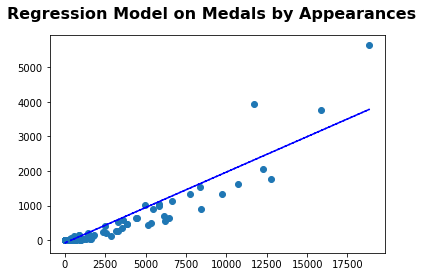

In [11]:
# Regression on Medals by Appearances

slope, intercept, r_value, p_value, std_err = linregress(appearances['ID'],medals['Medal'])
fit = slope * appearances['ID'] + intercept

fig, ax = plt.subplots()
    
fig.suptitle('Regression Model on Medals by Appearances', fontsize=16, fontweight="bold")

ax.plot(appearances['ID'], medals['Medal'], linewidth=0, marker='o')
ax.plot(appearances['ID'], fit, 'b--')

r_value, p_value;

In [ ]:
# Countries with 0 medals

medals_loser = medals[medals['Medal'] == 0]
medals_loser;

## MEDAL SHARE BY NATION

In [ ]:
# creating dfs for summer and winter olympics

summer_medals = df[df['Season'] == 'Summer'].groupby(['Country'])['Medal']
summer_medals_count = pd.DataFrame(summer_medals.count())
summer_medals_count = summer_medals_count.sort_values(by = 'Medal', ascending = False)

winter_medals = df[df['Season'] == 'Winter'].groupby(['Country'])['Medal']
winter_medals_count = pd.DataFrame(winter_medals.count())
winter_medals_count = winter_medals_count.sort_values(by = 'Medal', ascending = False)

In [ ]:
# creating labels and formatting percentages for pie charts

summer_labels = [x if y > summer_medals_count['Medal'].sum() * 0.017 else '' for x, y in zip(summer_medals_count.index, summer_medals_count['Medal'])]
winter_labels = [x if y > winter_medals_count['Medal'].sum() * 0.04 else '' for x, y in zip(winter_medals_count.index, winter_medals_count['Medal'])]
explode = (0.1)

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct >= 4 else ''

In [ ]:
# creating pie chart for summer olympics

plt.figure(figsize=(8, 8))
plt.title('Share of Medals Won by Nation:\nSummer Olympics', y = .95, fontdict = {
    'fontsize': 14,
    'fontweight':'bold'
})

plt.pie(summer_medals_count, startangle = 135, labels = summer_labels, autopct = my_autopct, radius=1, shadow = True, rotatelabels = False, textprops = {
    'fontsize':12
})


plt.show

plt.savefig('MedalShareSummer.png')

In [ ]:
# creating pie chart for winter olympics

plt.figure(figsize=(8, 8))
plt.title('Share of Medals Won by Nation:\nWinter Olympics', y = .95, fontdict = {
    'fontsize': 14,
    'fontweight':'bold'
})

plt.pie(winter_medals_count, startangle = 135, labels = winter_labels, autopct = my_autopct, radius = 1, shadow = True, textprops = {
    'fontsize':12
})

plt.show

plt.savefig('MedalShareWinter.png')

## DIFFERENCES BETWEEN MEN AND WOMEN

In [12]:
# create dfs for men and women

women = df[df['Sex'] == 'F'].drop_duplicates('Name')

men = df[df['Sex'] == 'M'].drop_duplicates('Name')


# descriptive statistics

women_desc = pd.DataFrame({
    'Average Height (cm)': [women['Height (cm)'].mean()],
    'Average Weight (kg)': [women['Weight (kg)'].mean()],
    'Average BMI': [women['BMI'].mean()]
}).round(2)

men_desc = pd.DataFrame({
    'Average Height (cm)': [men['Height (cm)'].mean()],
    'Average Weight (kg)': [men['Weight (kg)'].mean()],
    'Average BMI': [men['BMI'].mean()]
}).round(2)

In [ ]:
women_desc

In [ ]:
men_desc

In [21]:
# heaviest man and woman



men.sort_values(by = 'Weight (kg)', ascending = False).head()

women.sort_values(by = 'Weight (kg)', ascending = False).head();

In [20]:
# tallest man and woman

men.sort_values(by = 'Height (cm)', ascending = False).head(10)

women.sort_values(by = 'Height (cm)', ascending = True).head();

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x = df['Sex'], y = df['Weight (kg)'], width = .4).set_title('Weight Distribution by Gender')
plt.savefig('WeightDistribution.png')

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x = df['Sex'], y = df['Height (cm)'], width = .4).set_title('Height Distribution by Gender')
plt.savefig('HeightDistribution.png')

In [ ]:
#Isolate All Gold Medalists both male and female
goldMedals = final_df[final_df[Medal] == 'Gold')]
goldMedals.head()

In [ ]:
#Create DF of just Female gold Medalists
goldFemale = goldMedals[goldMedals[Sex] == "F")]

In [ ]:
#Create DF of just Male gold medalists
goldMale = goldMedals[goldMedals[Sex] == "M")]

In [ ]:
goldFemaleSport = goldFemale.Sport.value_counts().reset_index(name='Medal').head(20)
goldMaleSport = goldMale.Sport.value_counts().reset_index(name='Medal').head(20)

In [ ]:
goldMaleCountry = goldMale.Team.value_counts().reset_index(name='Medal').head(20) 
goldFemaleCountry = goldFemale.Team.value_counts().reset_index(name='Medal').head(20)

# Gold Medals by Team

In [ ]:
# Create a list indicating where to write x labels and set figure size to adjust for space
x_axis = np.arange(len(goldFemaleCountry))
tick_locations = [value for value in x_axis]

In [ ]:
plt.figure(figsize=(20,3))
p1 = plt.bar(x_axis, goldFemaleCountry["Medal"], color='b', alpha=0.5, align="center")
p2 = plt.bar(x_axis, goldMaleCountry["Medal"], color = 'r', bottom = goldFemaleCountry["Medal"],alpha=0.5, align="center")
plt.xticks(tick_locations, goldFemaleCountry["index"], rotation="vertical")

# Set a Title and labels
plt.title("Male and Female Gold Medals by Top 20 Teams")
plt.xlabel("Team/Country")
plt.ylabel("Number of Gold Medals")
plt.legend("WM")
plt.savefig("GenderCountry.jpg")

## Gold Medals by Sport

In [ ]:
plt.figure(figsize=(20,3))
p3 = plt.bar(x_axis, goldFemaleSport["Medal"], color='b', alpha=0.5, align="center")
p4 = plt.bar(x_axis, goldMaleSport["Medal"], color = 'r', bottom = goldFemaleSport["Medal"],alpha=0.5, align="center")
plt.xticks(tick_locations, goldFemaleSport["index"], rotation="vertical")

# Set a Title and labels
plt.title("Male and Female Gold Medals by Top 20 Sports")
plt.xlabel("Sport")
plt.ylabel("Number of Gold Medals")
plt.legend("WM")
plt.savefig("GenderMedals.jpg")

## DIFFERENCES BETWEEN SPORTS

In [ ]:
# dataframes with average height, weight, bmi per sport

grouped_men = men.groupby('Sport Category')['Height (cm)','Weight (kg)','BMI']
grouped_women = women.groupby('Sport Category')['Height (cm)','Weight (kg)','BMI']

sport_bmi_men = pd.DataFrame(grouped_men.mean().round(2).sort_values(by = 'BMI', ascending = True))
sport_bmi_men;

sport_bmi_women = pd.DataFrame(grouped_women.mean().round(2).sort_values(by = 'BMI', ascending = True))
sport_bmi_women;

sport_height_women = pd.DataFrame(grouped_women.mean().round(2).sort_values(by = 'Height (cm)', ascending = True))
sport_height_men = pd.DataFrame(grouped_men.mean().round(2).sort_values(by = 'Height (cm)', ascending = False))

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Average BMI by Olypic Sport:\nMen', fontdict = {
    'fontsize': 14,
    'fontweight':'bold'
})
plt.plot(sport_bmi_men.index, sport_bmi_men['BMI'],'rs-.')
plt.grid(True)
plt.ylabel('BMI')
plt.xticks(sport_bmi_women.index, rotation='25')
plt.show
plt.savefig('AverageBMIMen.png')

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Average BMI by Olympic Sport:\nWomen', fontdict = {
    'fontsize': 14,
    'fontweight':'bold'
})
plt.plot(sport_bmi_women.index, sport_bmi_women['BMI'], 'rs-.')
plt.grid(True)
plt.ylabel('BMI')
plt.xticks(sport_bmi_women.index, rotation='25')
plt.show
plt.savefig('AverageBMIWomen.png')

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Average Height (cm) by Olypic Sport:\nMen', fontdict = {
    'fontsize': 14,
    'fontweight':'bold'
})
plt.plot(sport_height_men.index, sport_height_men['Height (cm)'],'rs-.')
plt.grid(True)
plt.ylabel('Height (cm)')
plt.xticks(sport_height_men.index, rotation='25')
plt.show
plt.savefig('AverageHeightMen.png')

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Average Height (cm) by Olympic Sport:\nWomen', fontdict = {
    'fontsize': 14,
    'fontweight':'bold'
})
plt.plot(sport_height_women.index, sport_height_women['Height (cm)'], 'rs-.')
plt.grid(True)
plt.ylabel('Height (cm)')
plt.xticks(sport_height_women.index, rotation='25')
plt.show
plt.savefig('AverageHeightWomen.png')

## MEDALS BY NATION

In [ ]:
# Grouping data by country code
noc_data = final_df.groupby(['NOC']).count()

In [ ]:
# Sets-up x-axis and y-axis range
medal_df = pd.DataFrame(noc_data['Medal'])
medal_df = medal_df[(medal_df.T != 0).any()]
cold_war_df = medal_df.drop(labels = ['USA', 'URS'])

In [ ]:
# Plots bar chart
fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(cold_war_df.index, rotation = 45, ha="right")
plt.title("Lifetime Medal Count by Country")
plt.xlabel("Country Code")
plt.ylabel("Lifetime Medal Count")
bar_chart = plt.bar(cold_war_df.index, cold_war_df['Medal'])
plt.savefig('ColdWarMedalsBar')

In [ ]:
# Plots bar chart
fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(medal_df.index, rotation = 45, ha="right")
plt.title("Lifetime Medal Count by Country")
plt.xlabel("Country Code")
plt.ylabel("Lifetime Medal Count")
bar_chart = plt.bar(medal_df.index, medal_df['Medal'])
plt.savefig('MedalsByCountryBar.png')

In [ ]:
adjusted_df = final_df.reset_index(drop=True)
sort_df = adjusted_df.groupby(['Year', 'NOC']).count()
sort_df2=sort_df.reset_index()
df = sort_df2[['Medal','Year','NOC']]
noc_year = df['NOC'].value_counts()
noc_medal = noc_data['Medal']
noc_avg = noc_medal / noc_year
avg_df = pd.DataFrame(noc_avg, columns = ['Average'])
avg_df = avg_df[(avg_df.T != 0).any()]
woutliers_df = avg_df.drop(labels = ['EUN', 'URS'])

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(avg_df.index, rotation = 45, ha="right")
plt.title("Average Medal Count per Olympics by Country")
plt.xlabel("Country Code")
plt.ylabel("Average Medal Count per Olympics")
bar_chart = plt.bar(avg_df.index, avg_df['Average'])
plt.savefig('avg_chart.png')

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(woutliers_df.index, rotation = 45, ha="right")
plt.title("Average Medal Count per Olympics by Country")
plt.xlabel("Country Code")
plt.ylabel("Average Medal Count per Olympics")
bar_chart = plt.bar(woutliers_df.index, woutliers_df['Average'])
plt.savefig('avg_chart_woutliers.png')